In [31]:
#import panda and numpy library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
#read the files into dataframe structure
food =  pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)
nuitrition=pd.read_csv("8i. Australian Health Survey Classification System.csv", header=0,low_memory=False)

In [32]:
#Question 1
print("***\nQ1")
NO_Food=np.shape(food)                                        #find the dimension of the dataframe
print("Number of foods: "+str(NO_Food[0]))                    #print number of food(row)
print("Number of attributes: "+str(NO_Food[1]))               #print number of attributes(column)
datatype=food.dtypes                                          #show datatype of each column 
print(datatype)
print("***")

***
Q1
Number of foods: 5740
Number of attributes: 57
Food ID                                                object
Survey ID                                               int64
Food Name                                              object
Survey flag                                            object
Energy, with dietary fibre (kJ)                         int64
Energy, without dietary fibre (kJ)                      int64
Moisture (g)                                          float64
Protein (g)                                           float64
Total fat (g)                                         float64
Available carbohydrates, with sugar alcohols (g)      float64
Available carbohydrates, without sugar alcohol (g)    float64
Starch (g)                                            float64
Total sugars (g)                                      float64
Added sugars (g)                                      float64
Free sugars (g)                                       float64
Dietary fibre (g

In [33]:
#Question 2
print("***\nQ2")
Magnesium=food['Magnesium (Mg) (mg)']                        #find the serie "Magnesium"
median=round(Magnesium.median(),1)                           #find median of the serie and round it to one decimal
print("Median value of Magnesium: " +str(median))            #print median out
Moisture=food["Moisture (g)"]                                #find the serie "Moisture"
mean=round(Moisture.mean(),1)                                #find mean of the serie and round it to one decimal
print("Mean value of Moisture: " +str(mean))                 #print mean out
print("***")

***
Q2
Median value of Magnesium: 22.0
Mean value of Moisture: 56.3
***


In [34]:
#Question 3
print("***\nQ3")
# Part a
Survey_ID=food['Survey ID']                    #find the serie of Survey ID in food 
Survey_ID = Survey_ID.astype(str)              #convert datatype into string
# Part b
food['Food category']= Survey_ID.str.slice(stop=2)    #get the new dataframe with food category as header
# Part c
food_category=food['Food category']            #find a serie of this new attributes
NO_13=food_category.value_counts()["13"]       #find the number of food with category "13"
percentage=round(NO_13/NO_Food[0]*100, 1)      #find its percentage among all foods
print("% of foods which are Cereal based products and dishes (Food category 13)= ",percentage)#print the percentage out
print("***")

***
Q3
% of foods which are Cereal based products and dishes (Food category 13)=  15.9
***


***
Q4


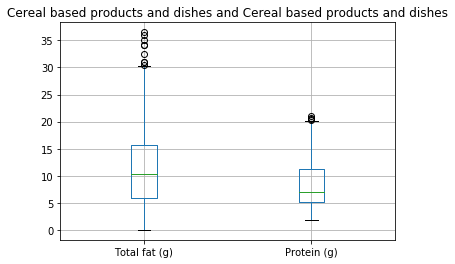

***


In [35]:
#Question 4
print("***\nQ4")
#build a new serie of total fat
cereal=food.loc[food["Food category"]=="13"]       #filter the food with food category 13
newfat=cereal["Total fat (g)"]                     #get the total fat of these food
#build a new serie of protein
newprotein=cereal["Protein (g)"]                   #get the protein of these food
newdataframe=pd.concat([newfat, newprotein], axis=1)                 #join two serie together
boxplot=newdataframe.boxplot()                                       #plot the dataframe
plt.title("Cereal based products and dishes and Cereal based products and dishes")
plt.show()      #show the plot
print("***")

***
Q5


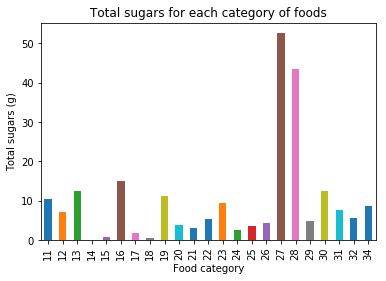

***


In [36]:
#Question 5
print("***\nQ5")
g=food.groupby(['Food category'])      #group food by food category
a=g.mean()                             #get the mean of each catagory
a["Total sugars (g)"].plot(kind='bar') #plat bar chart
plt.ylabel("Total sugars (g)")         #label y axis with total sugar
plt.title("Total sugars for each category of foods")
plt.show()                             #show the plot
print("***")

***
Q6


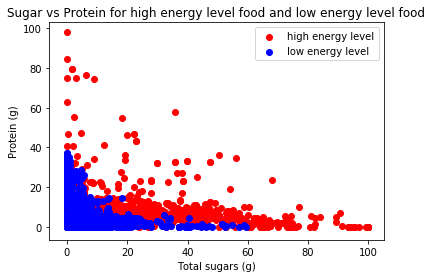

***


In [37]:
#Question 6
print("***\nQ6")
#Part a
#get a new column with boolean value depends on if energy is larger than 1000kJ
food['Energylevel']=food["Energy, with dietary fibre (kJ)"]>1000    
food['Energylevel'].astype(int)         #transfer boolean type in to 0 and 1

#Part b
#plot the scatter plot with red and blue color to distinguish different energy level

plotsugar1=food['Total sugars (g)'].loc[food['Energylevel']==1]   #find the sugar with high energy level
plotsugar0=food['Total sugars (g)'].loc[food['Energylevel']==0]   #find the sugar with low energy level
plotprotein1=food["Protein (g)"].loc[food['Energylevel']==1]      #find the protein with high energy level
plotprotein0=food["Protein (g)"].loc[food['Energylevel']==0]      #find the protein with low energy level
#scatter plot
plt.scatter(plotsugar1, plotprotein1,c= 'r')     #plot high energy level food
plt.scatter(plotsugar0, plotprotein0,c= 'b')     #plot low energy level food
plt.xlabel('Total sugars (g)')           #label x axis with "Total gugars (g)"
plt.ylabel("Protein (g)")                #label y axis with "Protein (g)"
plt.legend(["high energy level", "low energy level"])    #add legend
plt.title("Sugar vs Protein for high energy level food and low energy level food")     #add title                       #add title
plt.show()                               #show the plot
print("***")

***
Q7


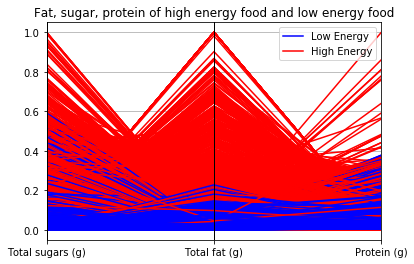

***


In [42]:
#Question 7
print("***\nQ7")
#Part a
#normalise protein
m=((food["Protein (g)"]-food["Protein (g)"].min())/
                     (food["Protein (g)"].max()-food["Protein (g)"].min()))
#normalise fat
y=((food["Total fat (g)"]-food["Total fat (g)"].min())/
                       (food["Total fat (g)"].max()-food["Total fat (g)"].min()))
#normalise sugar
z=((food["Total sugars (g)"]-food["Total sugars (g)"].min())/
                       (food["Total sugars (g)"].max()-food["Total sugars (g)"].min()))
#Part b
#Make a new dataframe to store normalised value
k=food['Energylevel']
F = pd.DataFrame(list(z), columns=["Total sugars (g)"])
F["Total fat (g)"]=y
F["Protein (g)"]=m
F['Energylevel']=k
#plot the parallel cordinates diagram
pd.plotting.parallel_coordinates(F[["Total sugars (g)","Total fat (g)", "Protein (g)",'Energylevel']],'Energylevel', color=("b", "r"))
plt.legend(["Low Energy", "High Energy"])  #insert legend
plt.title("Fat, sugar, protein of high energy food and low energy food")#add title
plt.show()     #show the plot
print("***")


***
Q8
1: Dripping, beef 900.8
2: Fat, solid, vegetable oil based 900.8
3: Lard 900.8
4: Shortening, commercial, animal fat (for short pastry, pie bases, tarts and flans) 900.8
5: Ghee, clarified butter 900.3


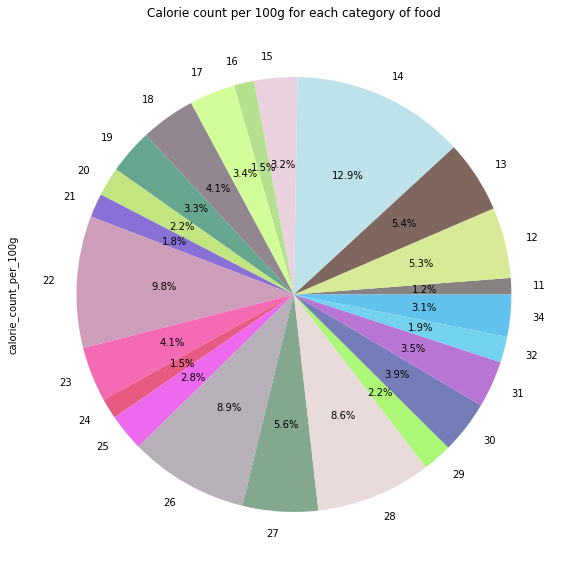

***


In [65]:
#Question 8
print("***\nQ8")
#Part a
#get the new column calorie_count_per_100g by formula
food["calorie_count_per_100g"]=4*food["Protein (g)"]+4*food["Available carbohydrates, with sugar alcohols (g)"]+7*food["Alcohol (g)"]+9*food["Total fat (g)"]
#Part b
calorie=food["calorie_count_per_100g"]        #get serie of calorie
f=food.nlargest(5, "calorie_count_per_100g")  #find first largest food based on calorie_count_per_100g
t=list(f['Food Name'])                 #transfer food name in to list to enable indexing for priting
p=list(f['calorie_count_per_100g'])    #transfer calorie in to list to enable indexing for priting
#print out the first five data in frame
for i in range(5):
    print(str((i+1))+": "+str(t[i])+" "+str(round(p[i],1)))
#Part c
q=food.groupby(['Food category'])   #group all food by 'food category'
w=q.mean()                          #get the mean of each category of food
#make a color list to demonstrate all sector with different color
import random
l=len(w)     #find the total number of color should be made
cs=[]        #make an empty list to append color tuple

for i in range(l):
    l=[]
    r=random.uniform(0.35, 1)  #get a random value of red [0,1]
    l.append(r)
    g=random.uniform(0.35, 1)  #get a random value of green [0,1]
    l.append(g)
    b=random.uniform(0.35, 1)  #get a random value of blue [0,1]
    l.append(b)
    t=tuple(l)              #make the color tuple in list
    cs.append(t)            #append the color tuple


#plot the pie chart
w["calorie_count_per_100g"].plot(kind="pie", autopct='%1.1f%%', colors=cs, figsize=(10,10))
plt.title("Calorie count per 100g for each category of food")  #add the title 
plt.show()     #show the plot
print("***")






In [63]:
#Question 9
print("***\nQ9")
#Part a
#read csv file
Healthfood =  pd.read_csv("8i. Australian Health Survey Classification System.csv", header=0,low_memory=False)
Healthfood['Food Group Code']=Healthfood['Food Group Code'].astype(str)     #change the dat type of food group code into string
food = food.merge(Healthfood, left_on='Food category', right_on='Food Group Code') #merge two dataframes together
#Part b
x=food.groupby(['Food Group and Sub-Group Name'])   #group food by total sugar
z=x.mean()                             #get the mean value of each category of food group by total sugars
Sugar=z['Total sugars (g)']         #get the total sugar column
dictionary = Sugar.to_dict()        #change the format to dictionary
file =json.dumps(dictionary,indent = 4)         #dump into json file
json.loads(file)                      #display



***
Q9


{'Alcoholic beverages': 4.8768115942028984,
 'Cereal based products and dishes': 12.493326039387297,
 'Cereals and cereal products': 7.063126252505006,
 'Confectionery and cereal/nut/fruit/seed bars': 43.47916666666667,
 'Dairy & meat substitutes': 3.70377358490566,
 'Egg products and dishes': 1.89010989010989,
 'Fats and oils': 0.08684210526315789,
 'Fish and seafood products and dishes': 0.8068403908794791,
 'Fruit products and dishes': 14.911895910780666,
 'Infant formulae and foods': 5.621428571428572,
 'Legume and pulse products and dishes': 3.6851851851851842,
 'Meat, poultry and game products and dishes ': 0.5052547770700639,
 'Milk products and dishes': 11.108381502890177,
 'Miscellaneous': 7.649350649350651,
 'Non-alcoholic beverages': 10.357763975155288,
 'Reptiles, amphibia and insects': 8.671428571428573,
 'Savoury sauces and condiments': 9.460126582278482,
 'Seed and nut products and dishes': 5.381818181818182,
 'Snack foods': 4.452830188679243,
 'Soup': 3.181720430107527,